In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
forestfire = pd.read_csv('forestfires.csv')
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
"""Data Exploration"""

# print shape of dataset with rows and columns
print(forestfire.shape)
# print top 5 records
forestfire.head()

(517, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
"""Data Exploration"""

# print shape of dataset with rows and columns
print(forestfire.shape)
# print top 5 records
forestfire.head()

(517, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
forestfire.describe()

forestfire.info()

forestfire.isnull().sum()

forestfire.duplicated()

forestfire.columns

forestfire.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],inplace=True)
forestfire


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
# List of Numerical Variables
numerical_features=[feature for feature in forestfire.columns if forestfire[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))


Number of numerical variables: 9


In [9]:
# Visualize the numerical variables
forestfire[numerical_features].head()

discrete_feature=[feature for feature in numerical_features if len(forestfire[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Discrete Variables Count: 2
Continuous Feature Count 7


In [10]:
# find categorical variables

categorical = [var for var in forestfire.columns if forestfire[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [11]:
"""Data Visualization"""

#Importing Libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

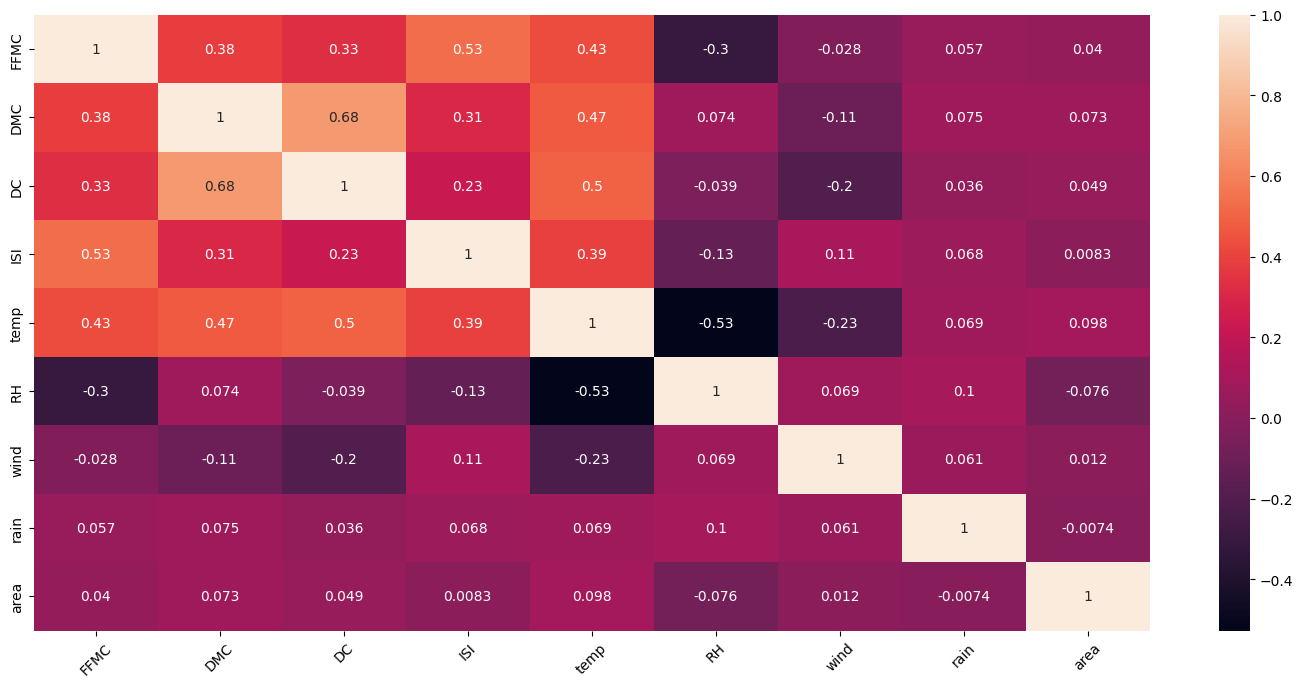

In [12]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forestfire.corr(), annot=True);
plt.xticks(rotation=45)

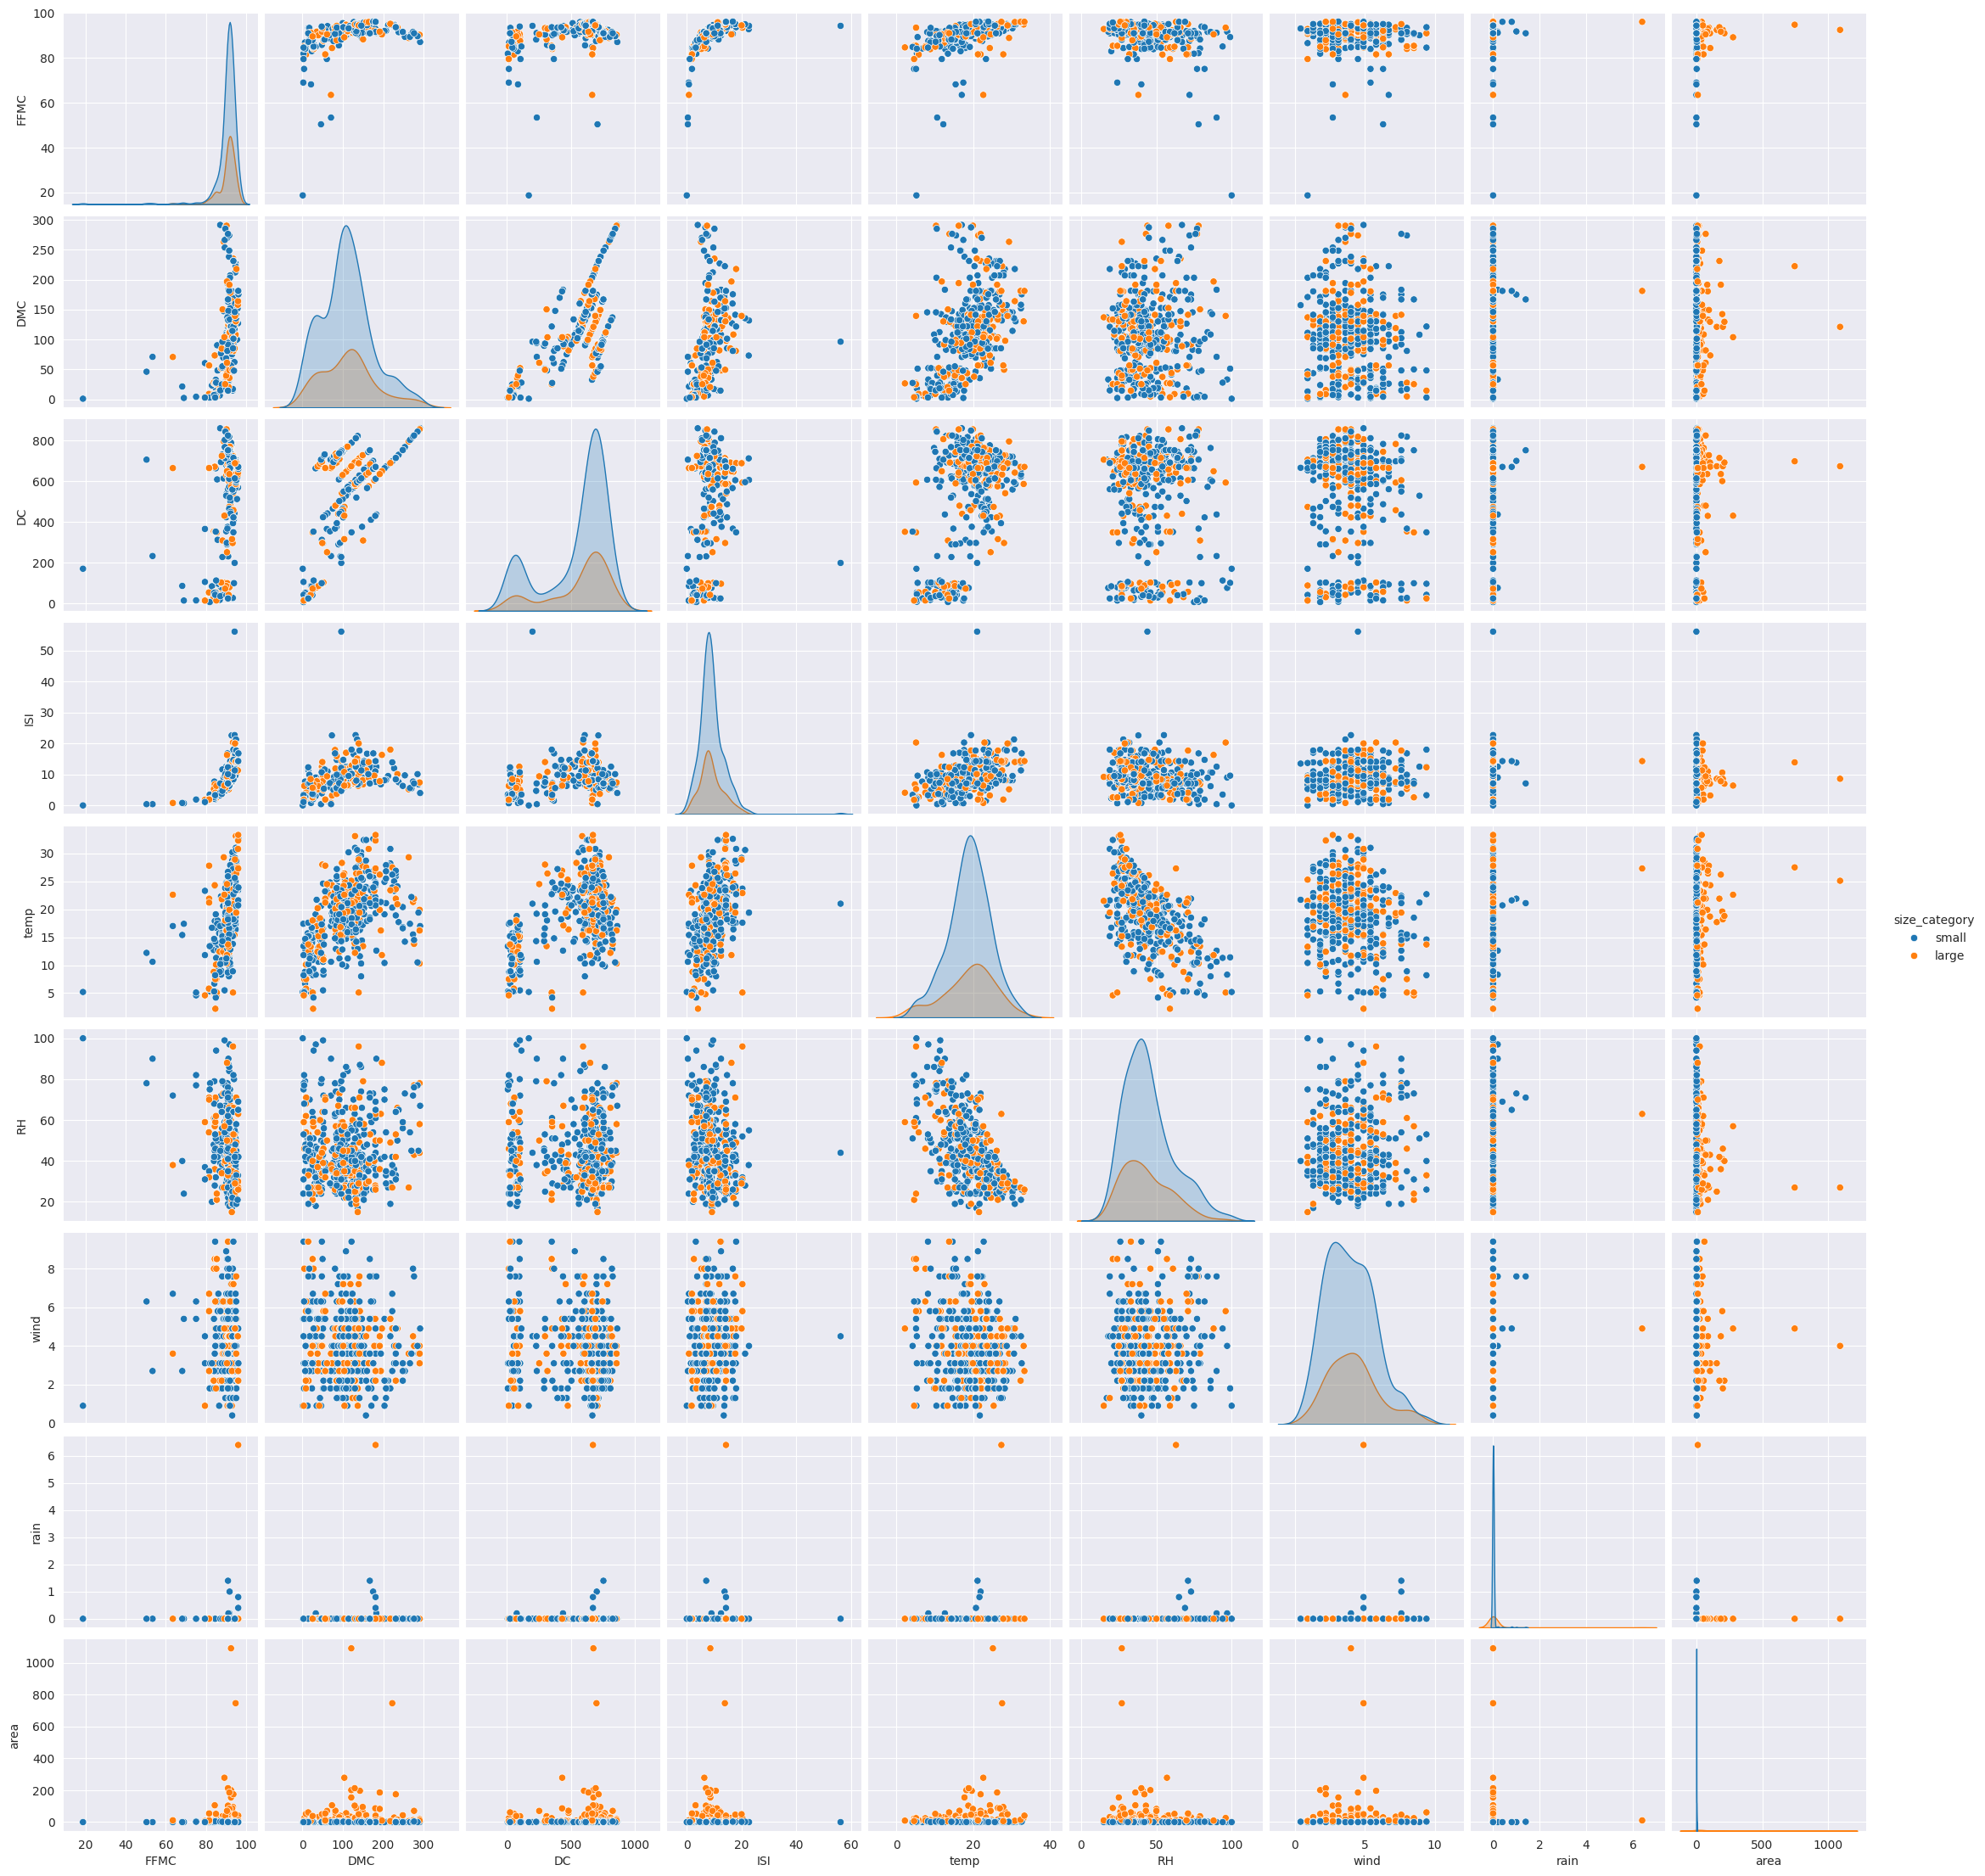

In [14]:
sns.set_style('darkgrid')
sns.pairplot(forestfire, hue='size_category')
plt.show()


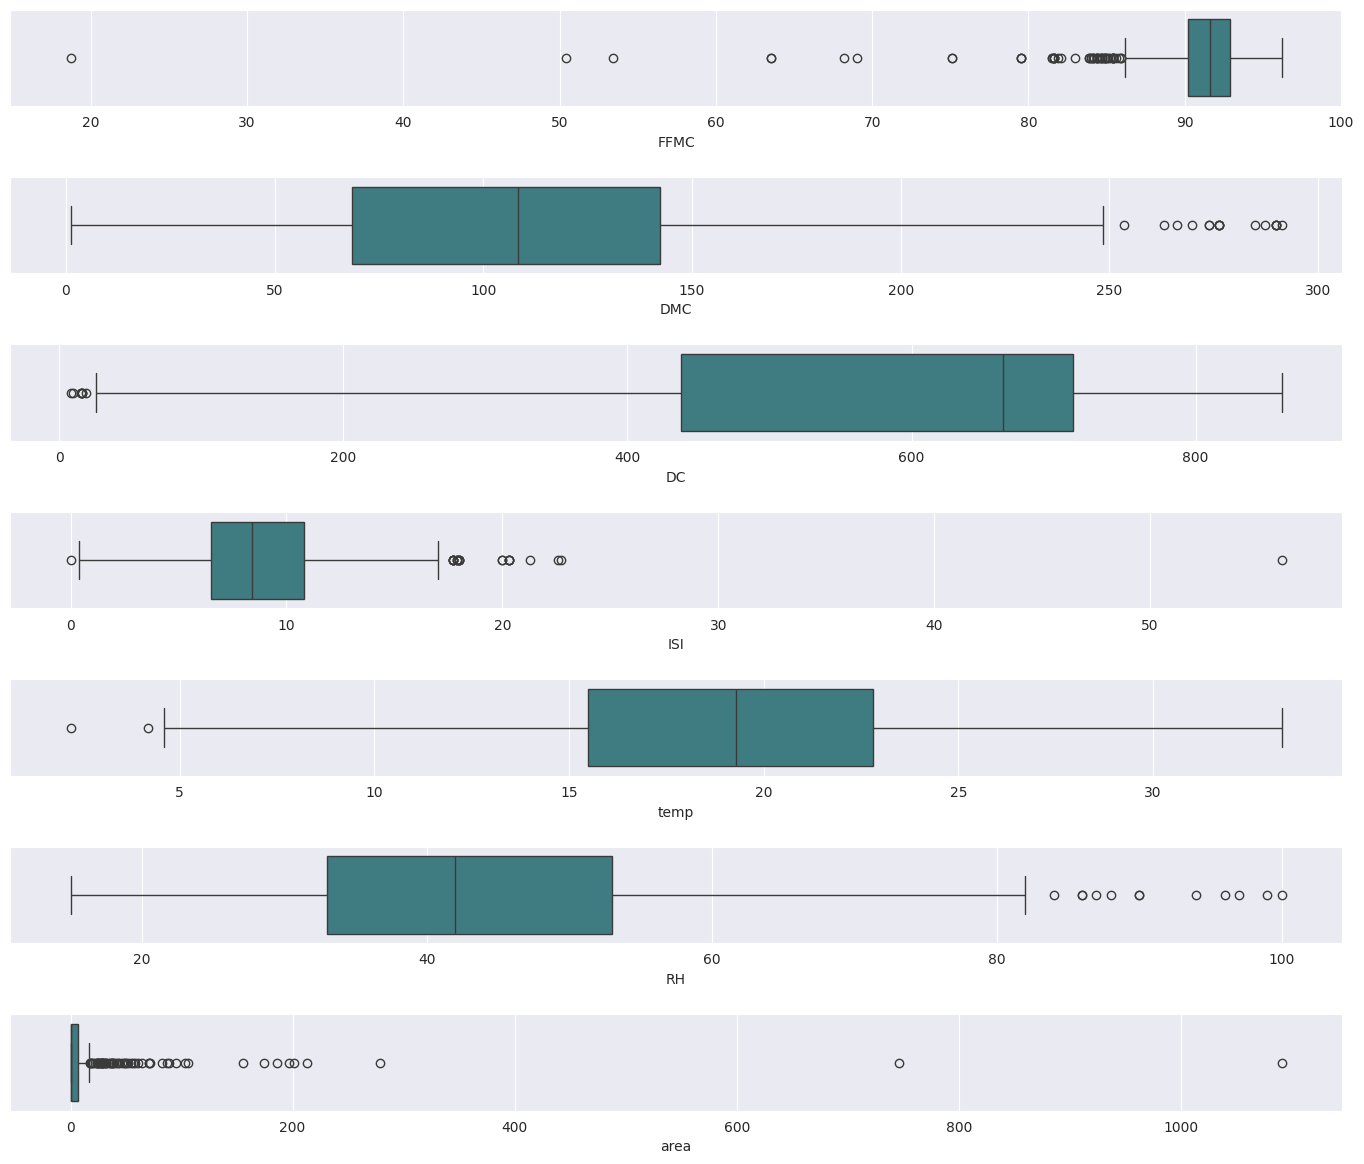

In [15]:
ot=forestfire.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)


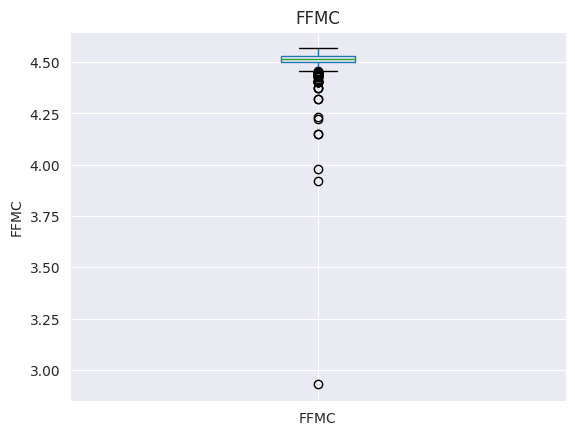

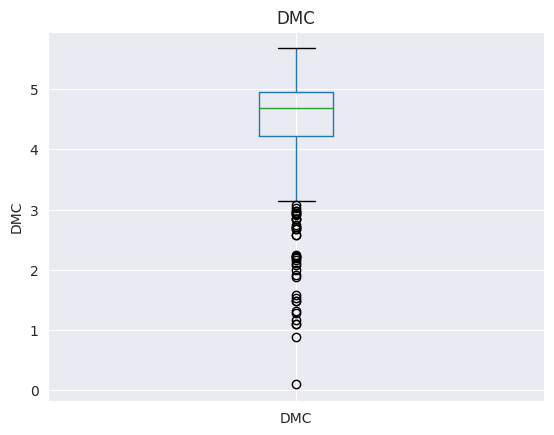

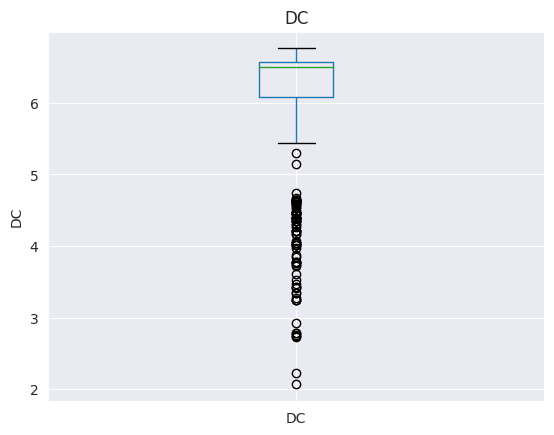

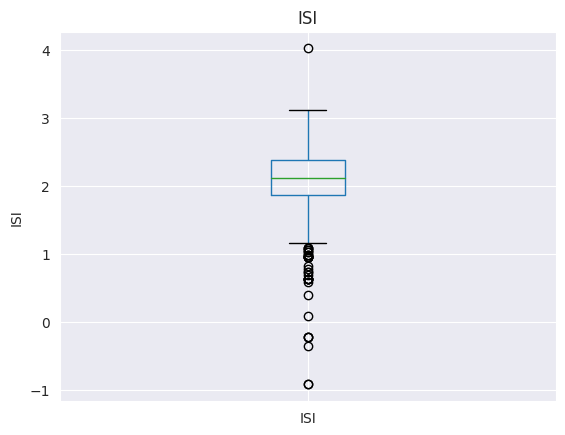

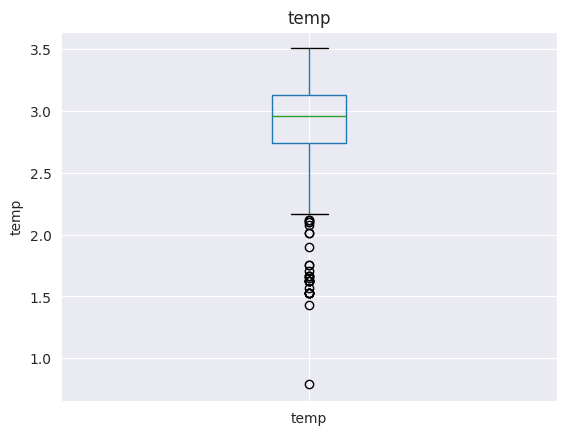

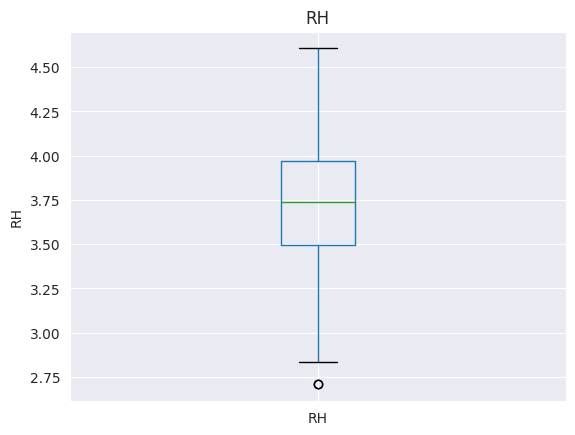

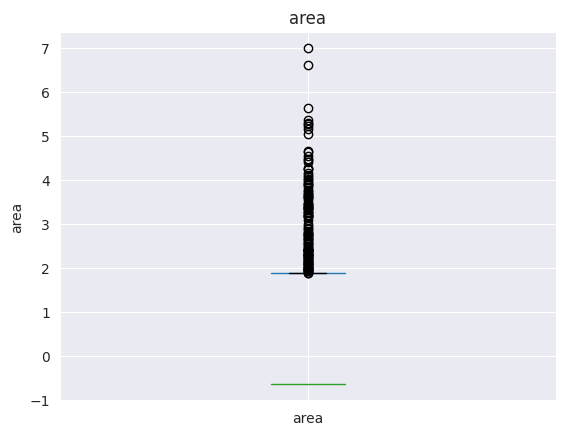

In [17]:
#forestfireAfter Log-Transformation
for feature in continuous_feature:
    data=forestfire.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [18]:
"""Data Pre-Processing"""

continuous_feature=[feature for feature in forestfire.columns if forestfire[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 9


In [19]:
forestfire[continuous_feature]

from sklearn.preprocessing import StandardScaler
df_standard_scaled = forestfire.copy()
features = df_standard_scaled[continuous_feature]

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [21]:
"""Label Encoding"""

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
forestfire["day"] = le.fit_transform(forestfire["day"])
forestfire["month"] = le.fit_transform(forestfire["month"])
forestfire["size_category"] = le.fit_transform(forestfire["size_category"])

forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [22]:

"""Test Train Split With Imbalanced Dataset"""

x = forestfire.drop('size_category',axis=1)
y = forestfire[['size_category']]

# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras
keras. __version__

forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [24]:
#assigning predictor variables to x and response variable to y
x = forestfire.drop('size_category',axis=1)
y = forestfire[['size_category']]


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

In [26]:
x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(413, 11)
(104, 11)
(413, 1)
(104, 1)


In [78]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.9249394536018372
batch_size: 5 - epochs: 10 Accuracy: 0.9564164876937866
batch_size: 5 - epochs: 50 Accuracy: 0.9782082438468933
batch_size: 5 - epochs: 100 Accuracy: 0.9661017060279846
batch_size: 10 - epochs: 5 Accuracy: 0.8789346218109131
batch_size: 10 - epochs: 10 Accuracy: 0.9612590670585632
batch_size: 10 - epochs: 50 Accuracy: 0.9782082438468933
batch_size: 10 - epochs: 100 Accuracy: 0.9757869243621826
batch_size: 15 - epochs: 5 Accuracy: 0.7602905631065369
batch_size: 15 - epochs: 10 Accuracy: 0.9782082438468933
batch_size: 15 - epochs: 50 Accuracy: 0.9830508232116699
batch_size: 15 - epochs: 100 Accuracy: 0.9757869243621826
batch_size: 20 - epochs: 5 Accuracy: 0.8280871510505676
batch_size: 20 - epochs: 10 Accuracy: 0.9515738487243652
batch_size: 20 - epochs: 50 Accuracy: 0.9757869243621826
batch_size: 20 - epochs: 100 Accuracy: 0.9782082438468933


In [79]:
ann = Sequential()

ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=10,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

history.history.keys()

Epoch 1/100
28/28 [==============================] - 1s 7ms/step - loss: 3.7961 - accuracy: 0.5978 - val_loss: 3.0440 - val_accuracy: 0.6861
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 2.1650 - accuracy: 0.6341 - val_loss: 1.6473 - val_accuracy: 0.6788
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 1.2699 - accuracy: 0.6812 - val_loss: 1.0659 - val_accuracy: 0.7299
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.7246 - val_loss: 0.7736 - val_accuracy: 0.7591
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.7428 - val_loss: 0.6185 - val_accuracy: 0.7956
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7935 - val_loss: 0.6314 - val_accuracy: 0.7810
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7899 - val_loss: 0.4519 - val_accuracy: 0.8175
Epoch 8/100
2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

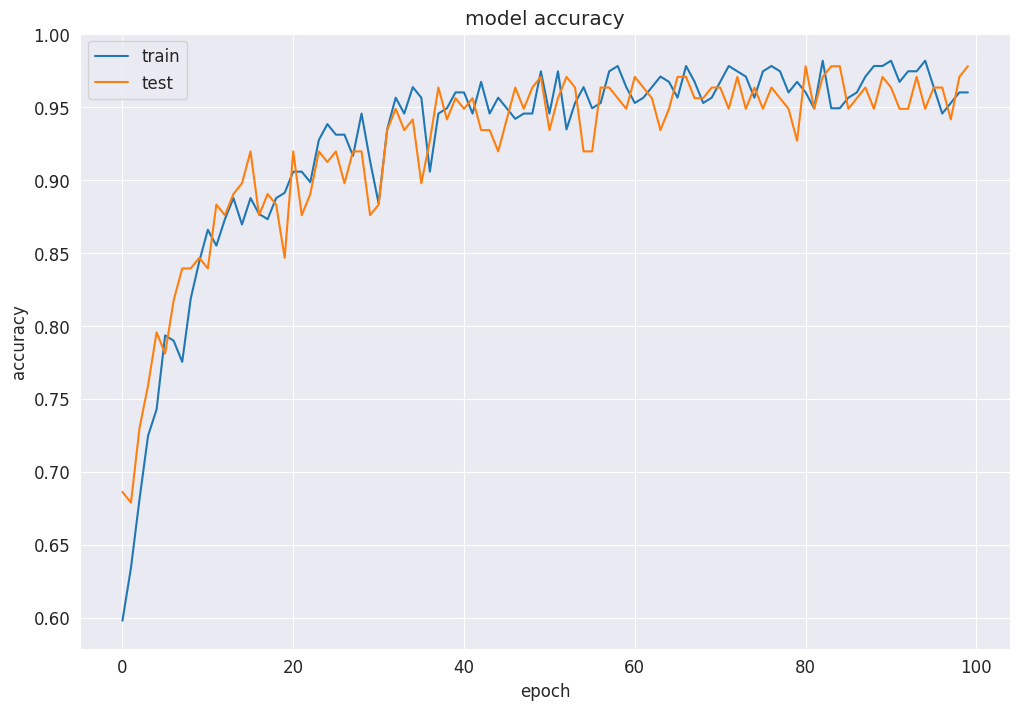

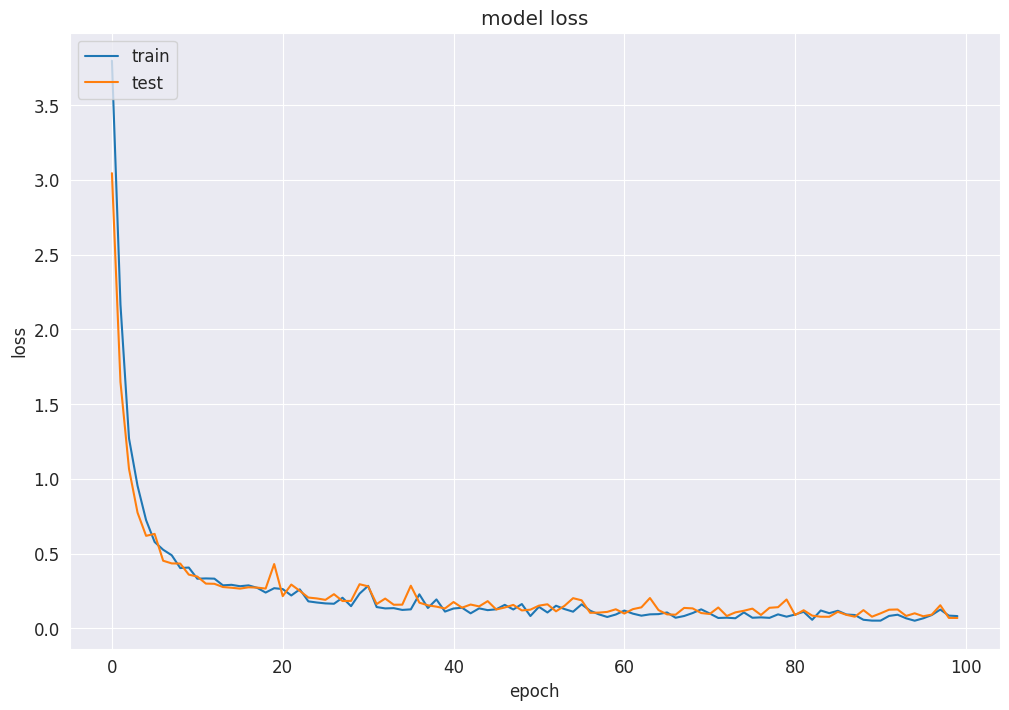

In [81]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [82]:
# generating predictions for test data
y_predict_test = ann.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 2ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
304,1,0.999957,1
501,1,0.994308,1
441,1,0.967522,1
153,1,0.987750,1
503,1,0.896313,1
131,1,0.997650,1
204,0,0.000002,0
512,0,0.223562,0
325,1,0.996608,1
247,1,0.985072,1


In [83]:
# generating predictions for train data
y_predict_train = ann.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 2ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
329,1,0.927982,1
173,1,0.946952,1
272,1,0.884952,1
497,0,0.000010,0
182,0,0.389372,0
268,1,0.990142,1
352,1,0.988816,1
117,1,0.983529,1
393,1,0.994178,1
332,0,0.002708,0


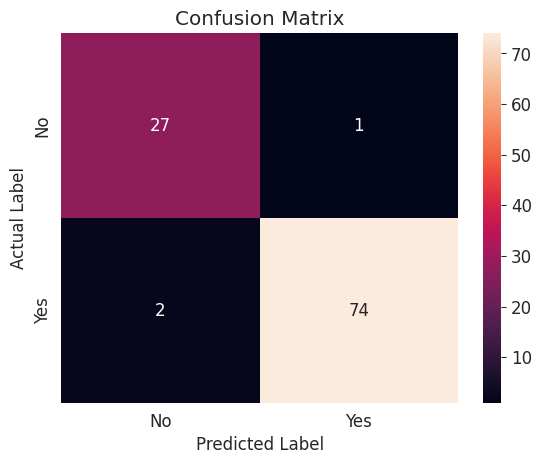

In [68]:
# plot confusion matrix to describe the performance of classifier.
from sklearn.metrics import confusion_matrix
cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

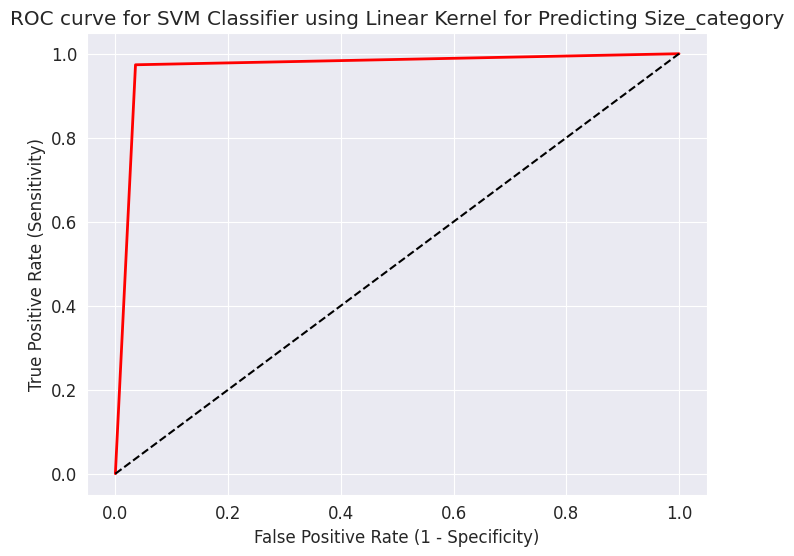

ROC AUC : 0.9690


In [84]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
print('ROC AUC : {:.4f}'.format(ROC_AUC))


Text(0, 0.5, 'Frequency')

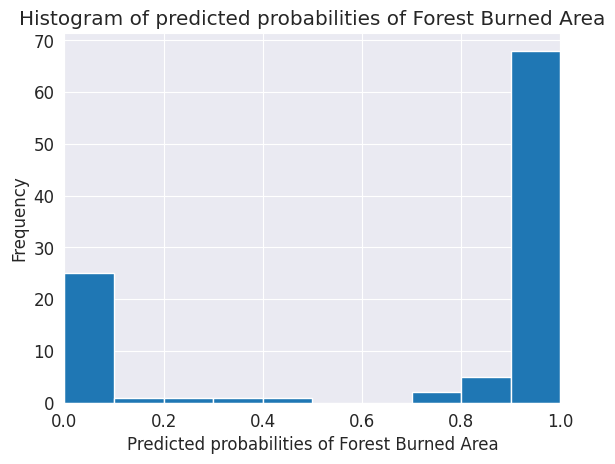

In [85]:
# plot histogram of predicted probabilities
# adjust the font size
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(test_prediction['Test_Probability'], bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Forest Burned Area')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')
